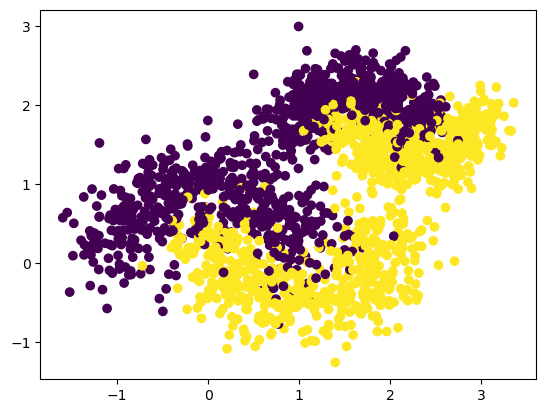

In [7]:
import numpy as np 
from sklearn.datasets import make_moons, make_circles
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



# data = make_circles(n_samples=3000, noise=0.1, random_state=0)
# data2 = make_circles(n_samples=3000, noise=0.1, random_state=1, factor=0.5)

data = make_moons(n_samples=1000, noise=0.3, random_state=0)
data2 = make_moons(n_samples=1000, noise=0.3, random_state=1)

X = np.concatenate([data[0], data2[0] / 1.5 + 1.6]) 
y = np.concatenate([data[1], data2[1]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize the data to 0-1
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())


def plot_decision_boundary(m, X, y):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = m.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y)


plt.scatter(X[:,0], X[:,1], c=y)

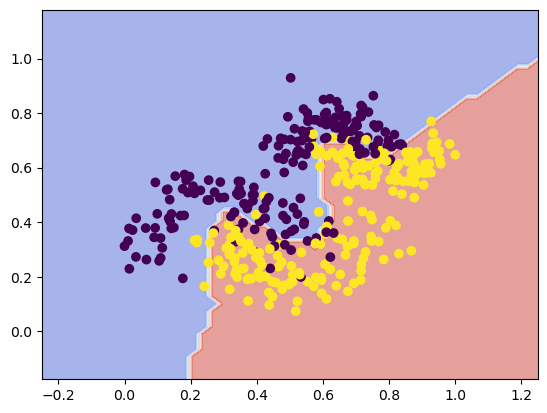

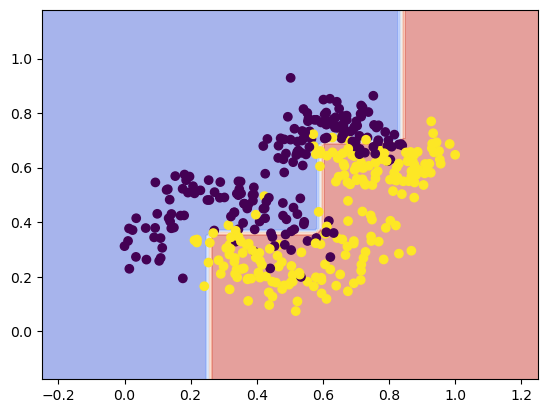

In [8]:
modelMLP = MLPClassifier(hidden_layer_sizes=(50,20, 5), max_iter=1000, learning_rate_init=0.01, solver='adam', random_state=1, activation='relu')
modelMLP.fit(X_train, y_train)

model_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model_rf.fit(X_train, y_train)

plot_decision_boundary(modelMLP, X_test, y_test)
plt.show()

plot_decision_boundary(model_rf, X_test, y_test)
plt.show()

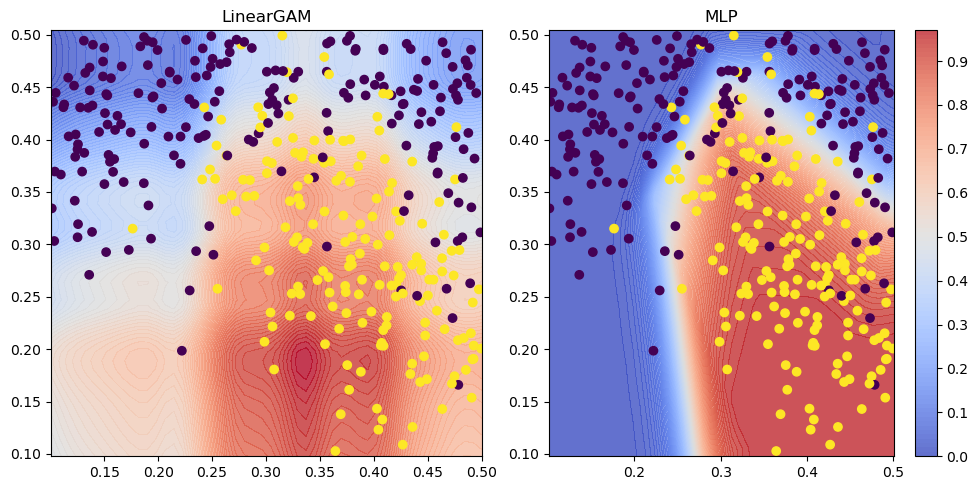

In [9]:
import pygam

def plot_decision_boundary_gam(m, X, y, bounds, ax=None):
    x_span = np.linspace(min(X[:,0]) - 0.01* bounds[0], max(X[:,0]) + 0.01* bounds[0])
    y_span = np.linspace(min(X[:,1]) - 0.01* bounds[1], max(X[:,1]) + 0.01* bounds[1])
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    if m.__class__.__name__ == 'LinearGAM':
        z = m.predict(grid)
        z = (z - z.min()) / (z.max() - z.min())
        z = z.reshape(xx.shape)
    else:
        z = m.predict_proba(grid)[:,1]
        z = z.reshape(xx.shape)
        
    if ax is None:
        plt.contourf(xx,yy,z, cmap=plt.cm.coolwarm, alpha=0.8, vmin=0, vmax=1, levels=100)
        plt.colorbar()
        plt.scatter(X[:,0], X[:,1], c=y)
    else:
        ax.contourf(xx,yy,z, cmap=plt.cm.coolwarm, alpha=0.8, vmin=0, vmax=1, levels=100)
        ax.scatter(X[:,0], X[:,1], c=y)

local_bounds = [0.10, 0.5]
local_X_train = X_train[(X_train[:,0] > local_bounds[0]) & (X_train[:,0] < local_bounds[1]) & (X_train[:,1] > local_bounds[0]) & (X_train[:,1] < local_bounds[1])]
local_y_train = y_train[(X_train[:,0] > local_bounds[0]) & (X_train[:,0] < local_bounds[1]) & (X_train[:,1] > local_bounds[0]) & (X_train[:,1] < local_bounds[1])]

gam = pygam.LinearGAM(pygam.s(0) + pygam.s(1)).fit(local_X_train, local_y_train)

fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_decision_boundary_gam(gam, local_X_train, local_y_train, local_bounds, ax=ax[0])
ax[0].set_title('LinearGAM')

plot_decision_boundary_gam(modelMLP, local_X_train, local_y_train, local_bounds, ax=ax[1])
ax[1].set_title('MLP')

# add colorbar
mappable = ax[1].collections[0]
plt.colorbar(mappable, ax=ax[1])

plt.tight_layout()
plt.show()
